In [1]:
using Scenred2, LightGraphs, TikzGraphs, TikzPictures


Use "abstract type SaveType end" instead.


In [2]:
T = 5
S = 3
R = 2

probas = rand(S)
probas = round.(probas./sum(probas),4)
probas[end] = 1-sum(probas[1:end-1])

scenarios = [Scenred2Scenario(p, round.(rand(T,R),3)) for p in probas ]

fan = Scenred2Fan(T,S,R,scenarios)

Scenred2.Scenred2Fan(5, 3, 2, Scenred2.Scenred2Scenario[Scenred2.Scenred2Scenario(0.3443, [0.572 0.311; 0.07 0.602; … ; 0.5 0.994; 0.985 0.634]), Scenred2.Scenred2Scenario(0.6059, [0.224 0.408; 0.28 0.935; … ; 0.416 0.556; 0.343 0.154]), Scenred2.Scenred2Scenario(0.0498, [0.958 0.042; 0.153 0.799; … ; 0.899 0.553; 0.782 0.087])])

In [3]:
fdg = DiGraph(fan)

ft=TikzGraphs.plot(fdg[1], string.(fdg[3]), edge_labels = fdg[2] )

TikzPictures.save(PDF("fan"), ft)

In [4]:
prms = Scenred2Prms(red_percentage = 0.5)

tree = Scenred2Tree(fan, prms)

gg = Graph(tree)


***********************************************
*  SCENARIO TREE CONSTRUCTION / REDUCTION     *
*                                             *
*  S C E N R E D - 2                          *
*                                             *
*  VERSION: 12/12/2008                        *
*                                             *
*  (C) - Humboldt-University Berlin           *
*        Institute of Mathematics             *
*        Written by: Holger Heitsch           *
*                                             *
***********************************************

YOU ARE EXECUTING THE COMMAND LINE VERSION

MAIN: READ COMMAND FILE
    TREE CONSTRUCTION SELECTED
    READ SCENARIO PARAMETERS
    OUTPUT OF TREE
MAIN: READ COMMAND FILE DONE
MAIN: START TREE CONSTRUCTION
    DETECT CONSTRUCTION METHOD
    CONSTRUCTION METHOD BACKWARD
    READ CONSTRUCTION OPTIONS
    ASSIGN SCENARIO DISTANCES
    START BACKWARD TREE CONSTRUCTION
      REDUCTION METHOD: FORWARD
    *** SCENARIO TREE C

({7, 6} undirected simple Int64 graph, Any[1.0, 1.0, 0.3941, 0.6059, 0.3941, 0.6059], Array{Float64,1}[[0.3804, 0.3564], [0.28, 0.935], [0.095, 0.772], [0.5, 0.994], [0.416, 0.556], [0.985, 0.634], [0.343, 0.154]])

In [5]:
dg = DiGraph(tree)

({7, 6} directed simple Int64 graph, Dict{Any,Any}(Pair{Any,Any}((5, 7), 0.6059),Pair{Any,Any}((1, 2), 1.0),Pair{Any,Any}((2, 3), 1.0),Pair{Any,Any}((4, 6), 0.3941),Pair{Any,Any}((3, 4), 0.3941),Pair{Any,Any}((3, 5), 0.6059)), Array{Float64,1}[[0.3804, 0.3564], [0.28, 0.935], [0.095, 0.772], [0.5, 0.994], [0.416, 0.556], [0.985, 0.634], [0.343, 0.154]])

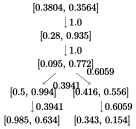

In [6]:
t=TikzGraphs.plot(dg[1], string.(dg[3]), edge_labels = dg[2] )

In [7]:
TikzPictures.save(PDF("tree"), t)